In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [2]:
# -----------------------------
# Load dataset with selected features
# -----------------------------
df = pd.read_csv('../data/heart_disease_selected_features.csv')

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

In [3]:
# -----------------------------
# Split into training and testing sets
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# -----------------------------
# Standardize features (important for SVM)
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# -----------------------------
# Initialize models
# -----------------------------
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}


In [6]:
# -----------------------------
# Train models and evaluate
# -----------------------------
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    
    # Use scaled data for SVM and Logistic Regression
    if name in ['Logistic Regression', 'SVM']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:,1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    results[name] = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-Score': f1, 'AUC': auc}
    
    print(f"{name} Metrics:")
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-Score: {f1:.4f}, AUC: {auc:.4f}\n")


Training Logistic Regression...
Logistic Regression Metrics:
Accuracy: 0.9016, Precision: 0.9062, Recall: 0.9062, F1-Score: 0.9062, AUC: 0.9440

Training Decision Tree...
Decision Tree Metrics:
Accuracy: 0.8033, Precision: 0.8125, Recall: 0.8125, F1-Score: 0.8125, AUC: 0.8028

Training Random Forest...
Random Forest Metrics:
Accuracy: 0.8852, Precision: 0.8788, Recall: 0.9062, F1-Score: 0.8923, AUC: 0.9537

Training SVM...
SVM Metrics:
Accuracy: 0.8525, Precision: 0.8710, Recall: 0.8438, F1-Score: 0.8571, AUC: 0.9440



In [7]:
# -----------------------------
# Summary of all models
# -----------------------------
results_df = pd.DataFrame(results).T
print("All Models Performance:\n", results_df)

All Models Performance:
                      Accuracy  Precision   Recall  F1-Score       AUC
Logistic Regression  0.901639   0.906250  0.90625  0.906250  0.943966
Decision Tree        0.803279   0.812500  0.81250  0.812500  0.802802
Random Forest        0.885246   0.878788  0.90625  0.892308  0.953664
SVM                  0.852459   0.870968  0.84375  0.857143  0.943966


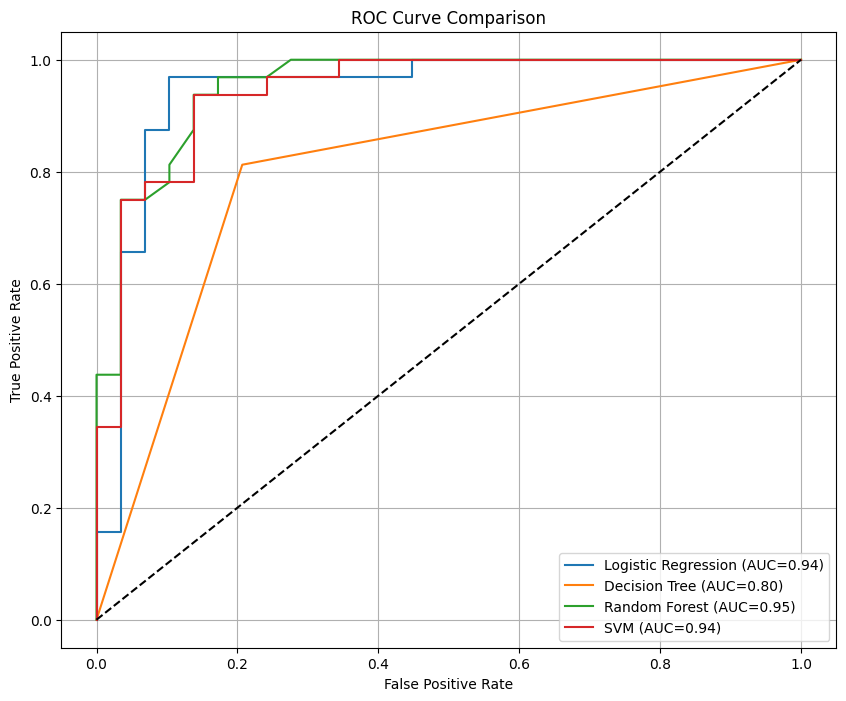

In [9]:
# -----------------------------
# Plot ROC curves
# -----------------------------
plt.figure(figsize=(10,8))

for name, model in models.items():
    if name in ['Logistic Regression', 'SVM']:
        y_prob = model.predict_proba(X_test_scaled)[:,1]
    else:
        y_prob = model.predict_proba(X_test)[:,1]
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc_score(y_test, y_prob):.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()







